In [167]:
import numpy as np
from scipy.special import lpmn as lpmn
from scipy.interpolate import interp1d
import numpy.polynomial.legendre as lgdr
import healpy as h
import scipy.integrate as intg
import time
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Populates the array of Pl2 legendre functions
theta=linspace(0,pi,10000)
lmax=96
ell=arange(lmax+1)
pl2=np.zeros((lmax+1,np.size(theta)),float)
for i in range(theta.size):
    y,temp=lpmn(2,lmax,np.cos(theta[i]))
    for l in range(lmax+1):
        pl2[l,i]=y[2,l]

In [192]:
def f2theta(x,x0=15.,sigma=5.,n=2.):
    x0=x0*pi/180.
    sigma=sigma*pi/180.
    return (x**n)*exp(-((x-x0)/(2.*sigma))**2.)

def fnpl2(x,l1):
    tempf1=interp1d(np.cos(theta),pl2[l1,:],kind="cubic")
    return tempf1(x)

def prodpl1pl2(x,l1,l2):
    tempf1=interp1d(np.cos(theta),pl2[l1,:],kind="cubic")
    tempf2=interp1d(np.cos(theta),pl2[l2,:],kind="cubic")
    return tempf1(x)*tempf2(x)

def pl2norm(l1):
    return (2./(2.*l1+1.))*(l1+2)*(l1+1)*l1*(l1-1)

def test_integrand(x,l1,l2):
    return fnpl2(np.cos(x),l1)*fnpl2(np.cos(x),l2)*np.sin(x)

def integrand(x,l1,a=15.,b=5.,n=2.):
    return f2theta(x,a,b,n)*fnpl2(np.cos(x),l1)*np.sin(x)

def integrand_step(x,l1):
    ftheta=interp1d(theta,rectheta,kind="cubic")
    return ftheta(x)*fnpl2(np.cos(x),l1)*np.sin(x)

def fnstep(x,x0):
    y=np.ones(x.size,float)
    y[x>x0]=0.
    return y

<IPython.core.display.Javascript object>


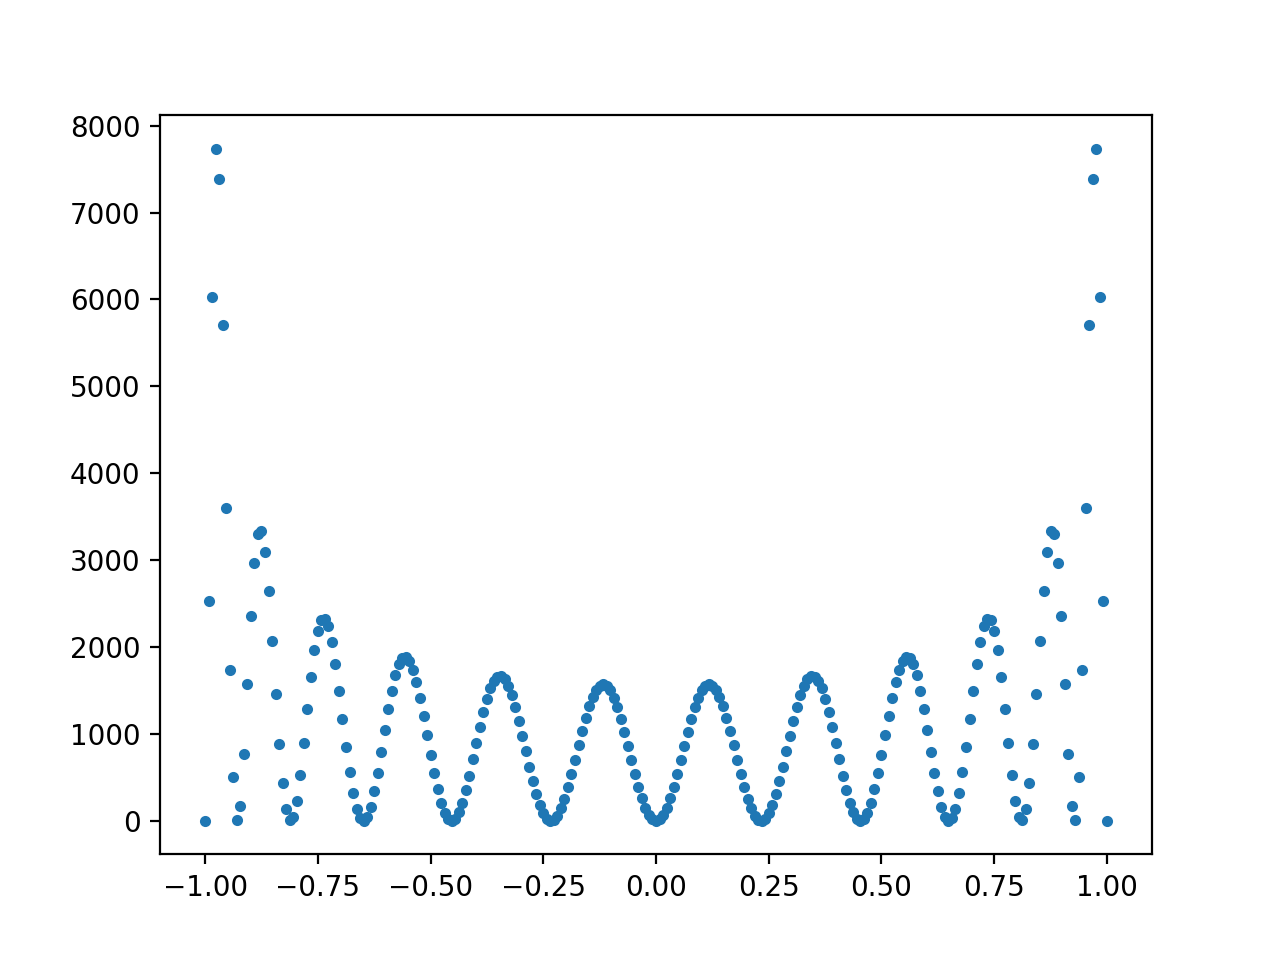

In [143]:
n=8 ; xx=linspace(-1,1,2**n+1) ; y=prodpl1pl2(xx,l1,l2)
plot(xx,y,".")

In [154]:
# Testing the orthonormality of the Pl2 functions
l1=13 ;l2=12


t1=time.time()
print quad(prodpl1pl2,-1.,1.,args=(l1,l2))[0]/pl2norm(l2)
print "Quad time:",time.time()-t1

t1=time.time()
n=18 ; xx=linspace(-1,1,2**n+1) ; y=prodpl1pl2(xx,l1,l2)
print romb(y,dx=2./(2**n+1))/pl2norm(l2)
print "Romb time:",time.time()-t1

t1=time.time()
print quadrature(prodpl1pl2,-1,1,args=(l1,l2))[0]/pl2norm(l2)
print "Quadrature time:",time.time()-t1

-8.99708711139e-17
Quad time: 0.117810964584
-2.59616380327e-17
Romb time: 0.0391139984131
-1.1830548381e-16
Quadrature time: 0.00974798202515


<IPython.core.display.Javascript object>


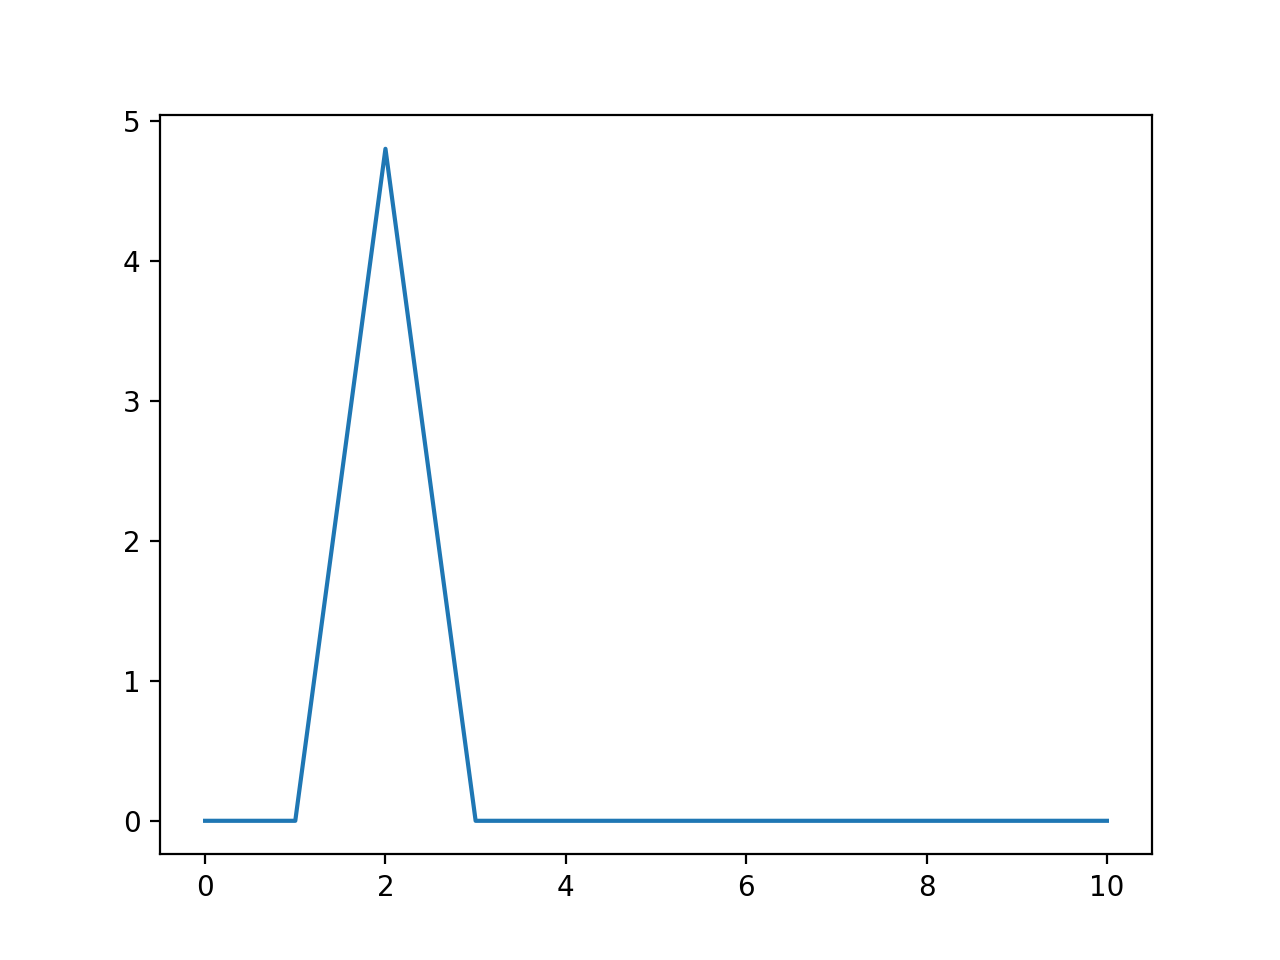

In [6]:
lmax=10
ell=arange(lmax+1)
cl2=zeros(lmax+1,float)
for i in arange(lmax-1):
    l1=i+2
    cl2[l1]=quad(test_integrand,0.,pi,args=(l1,2))[0]/norm(l1)
    
figure()
plot(ell,cl2)

<IPython.core.display.Javascript object>


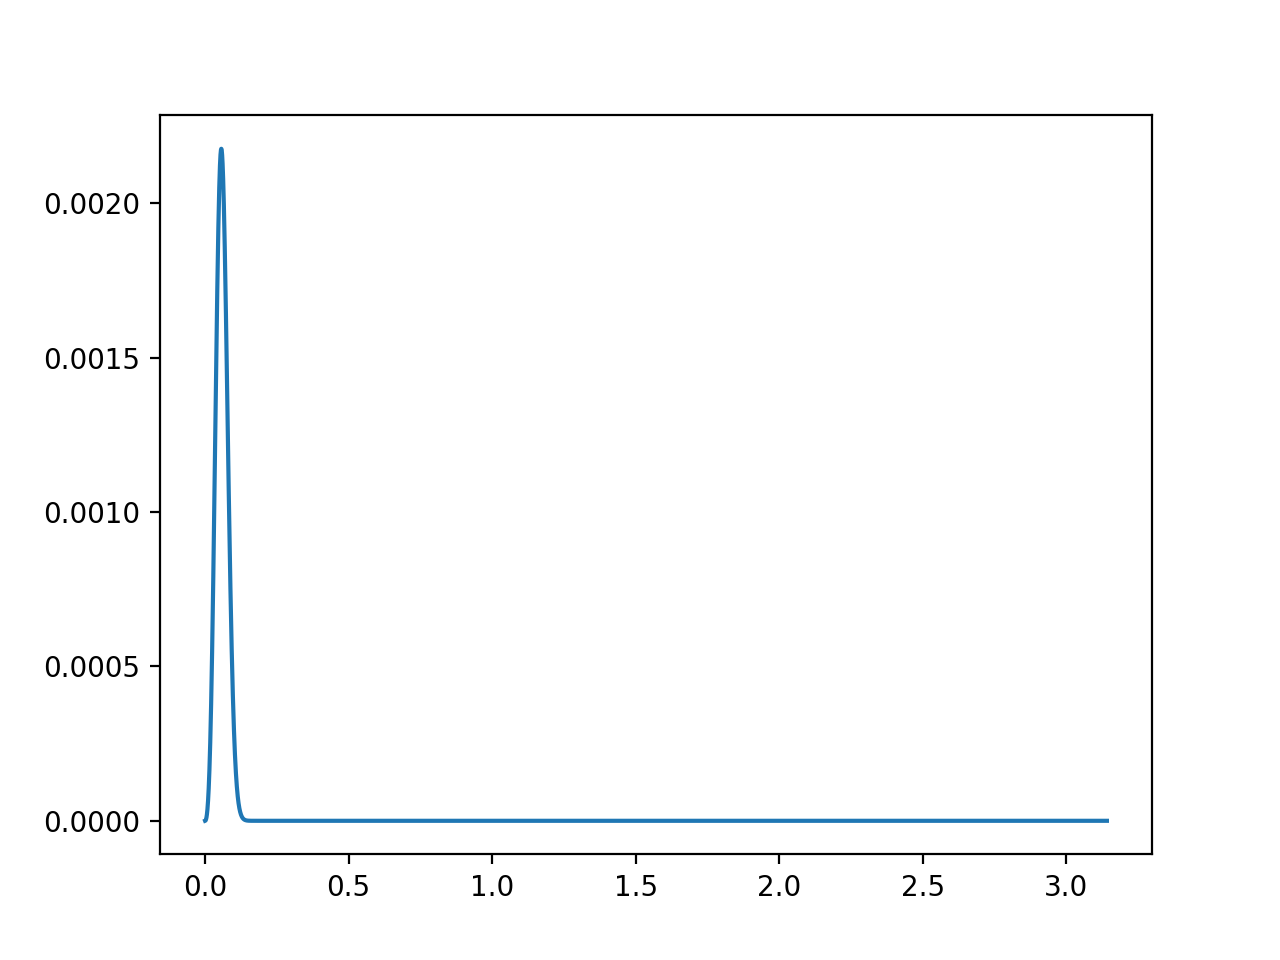

In [47]:
figure()
x=cos(theta)
shift=2. ; width=1. ; slope=2.
y=f2theta(theta,x0=shift,sigma=width,n=slope)
plot(theta,y)

<IPython.core.display.Javascript object>


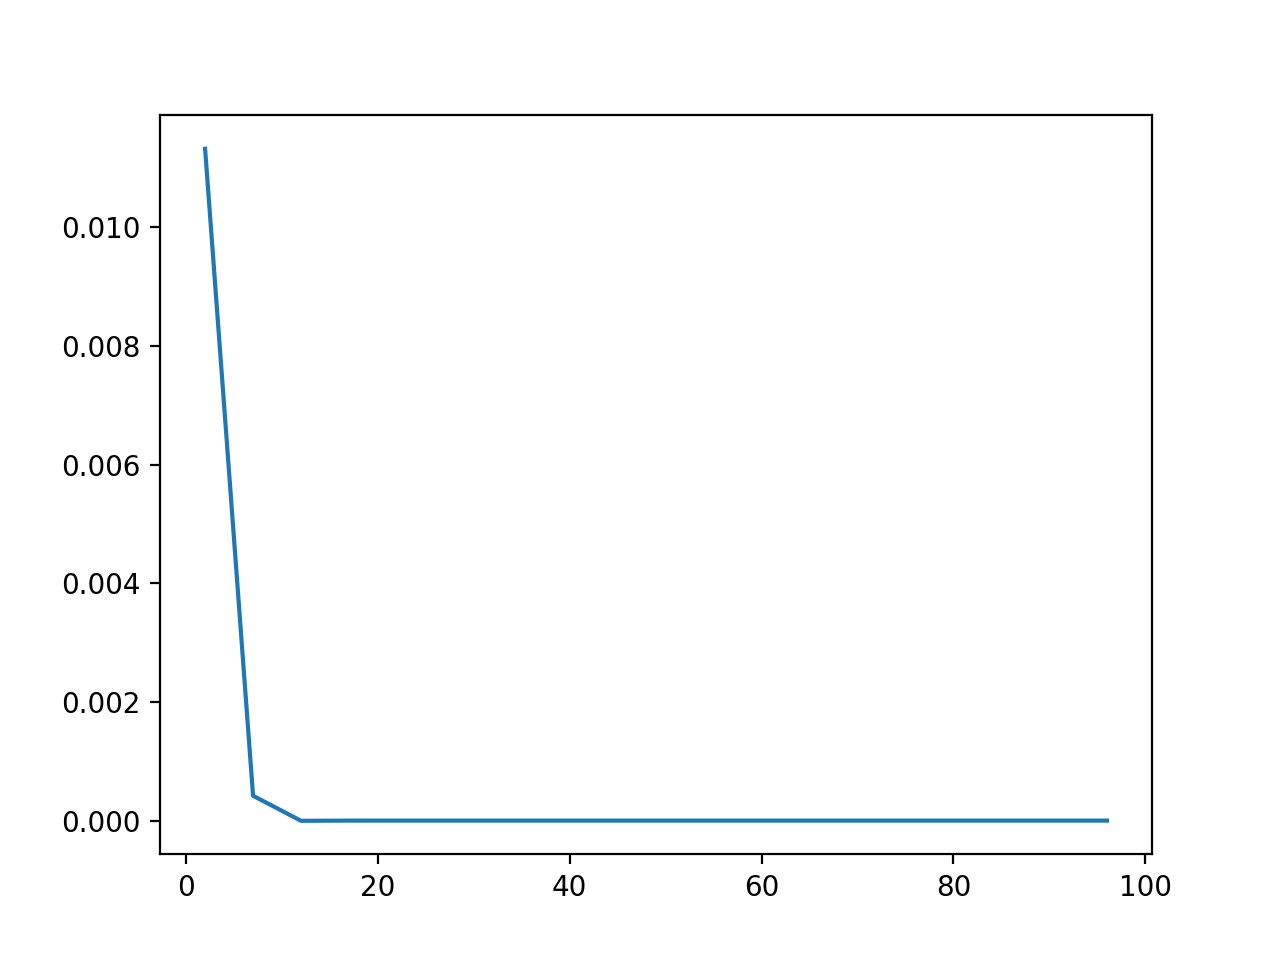

In [29]:
lmax=96
ell=arange(lmax+1)
ellstart=2 ; ellstep=5
sparse_ell=[]
sparse_cl2=[]
l=ellstart ; istep=0
while (l1 <  lmax):
    l1=min(ellstart+ istep*ellstep,lmax)
    sparse_ell=append(sparse_ell,l1)
    tempcl=quad(integrand,0.,pi,args=(l1,shift,width,slope))[0]*sqrt(4.*pi/(2.*l1+1.))/pl2norm(l1)
    sparse_cl2=append(sparse_cl2,tempcl)
    istep=istep+1
    print "Hello",l1,istep

figure()
plot(sparse_ell,sparse_cl2)

In [204]:
print min(180.,180.*24/lmax)

45.0


In [205]:
print shift,width,slope
lmax=96
ell=arange(lmax+1)
cl2=zeros(lmax+1,float)
cl2step=zeros(lmax+1,float)
for i in arange(lmax-1):
    l1=i+2
    print l1
    #cl2[l1]=quad(integrand,0.,pi,args=(l1,shift,width,slope))[0]*sqrt(4.*pi/(2.*l1+1.))/pl2norm(l1)
    #cl2step[l1]=intg.quad(integrand_step,0.,pi*30./180.,args=(l1))[0]*sqrt(4.*pi/(2.*l1+1.))/pl2norm(l1)
    cl2step[l1]=intg.quadrature(integrand_step,0.,pi*45./180.,args=(l1),rtol=1e-4,tol=1e-8,maxiter=100)[0]*sqrt(4.*pi/(2.*l1+1.))/pl2norm(l1)
    
# Calculate c(theta) given cl2 coefficients
rectheta2=zeros(theta.size,float)
rectheta2step=zeros(theta.size,float)
#def cal_ctheta(cl,lmax):   
for i in arange(theta.size):
    for j in arange(lmax-1):
        l=j+2
        rectheta2[i]=rectheta2[i] + cl2[l]*sqrt((2.*l+1)/(4.*pi))*pl2[l,i]
        rectheta2step[i]=rectheta2step[i] + cl2step[l]*sqrt((2.*l+1)/(4.*pi))*pl2[l,i]
        
# Calculate c(theta) inverse given cl2 coefficients
rectheta2inv=zeros(theta.size,float)
#def cal_ctheta(cl,lmax):   
for i in arange(theta.size):
    for j in arange(lmax-1):
        l=j+2
        rectheta2inv[i]=rectheta2inv[i] + (1./cl2[l])*sqrt((2.*l+1)/(4.*pi))*pl2[l,i]

2.0 1.0 2.0
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96


/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in double_scalars
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in double_scalars


<IPython.core.display.Javascript object>


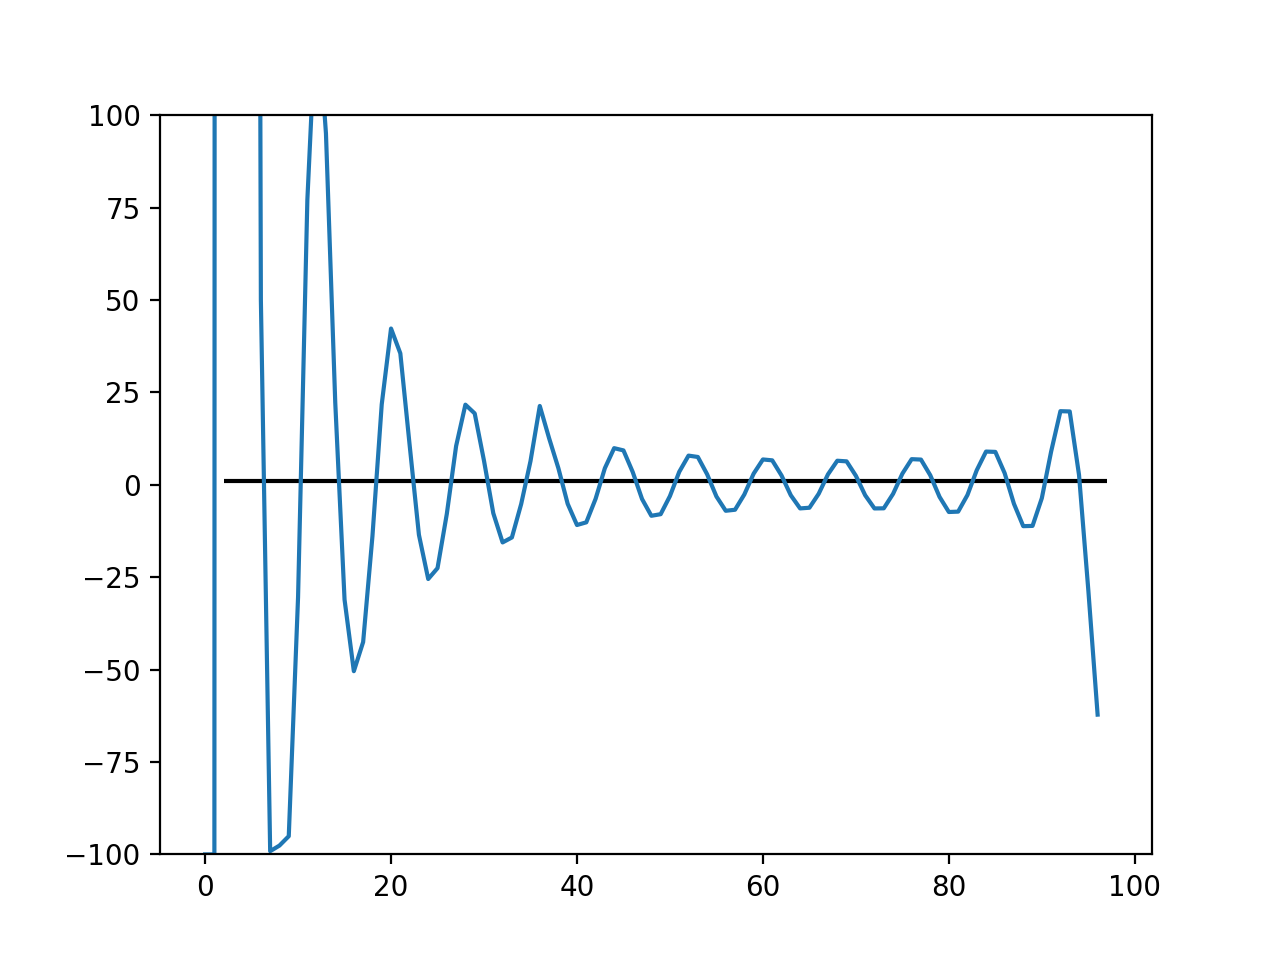

(-100, 100)

In [211]:
figure()
plot(ell[:97],((cl2step**2.)-1)*100)
hlines(1,2,97)
ylim(-100,100)

<IPython.core.display.Javascript object>


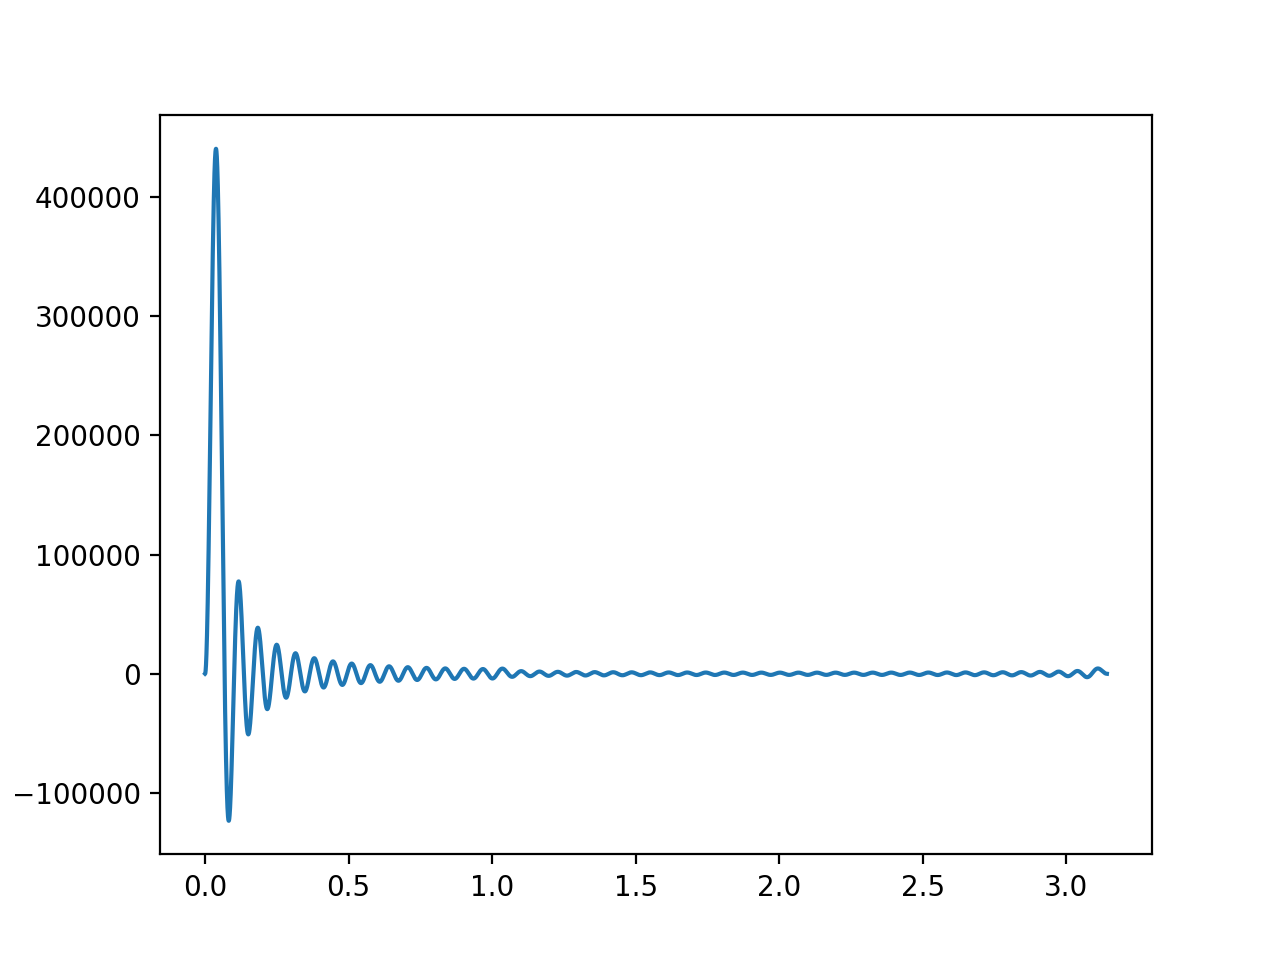

<IPython.core.display.Javascript object>


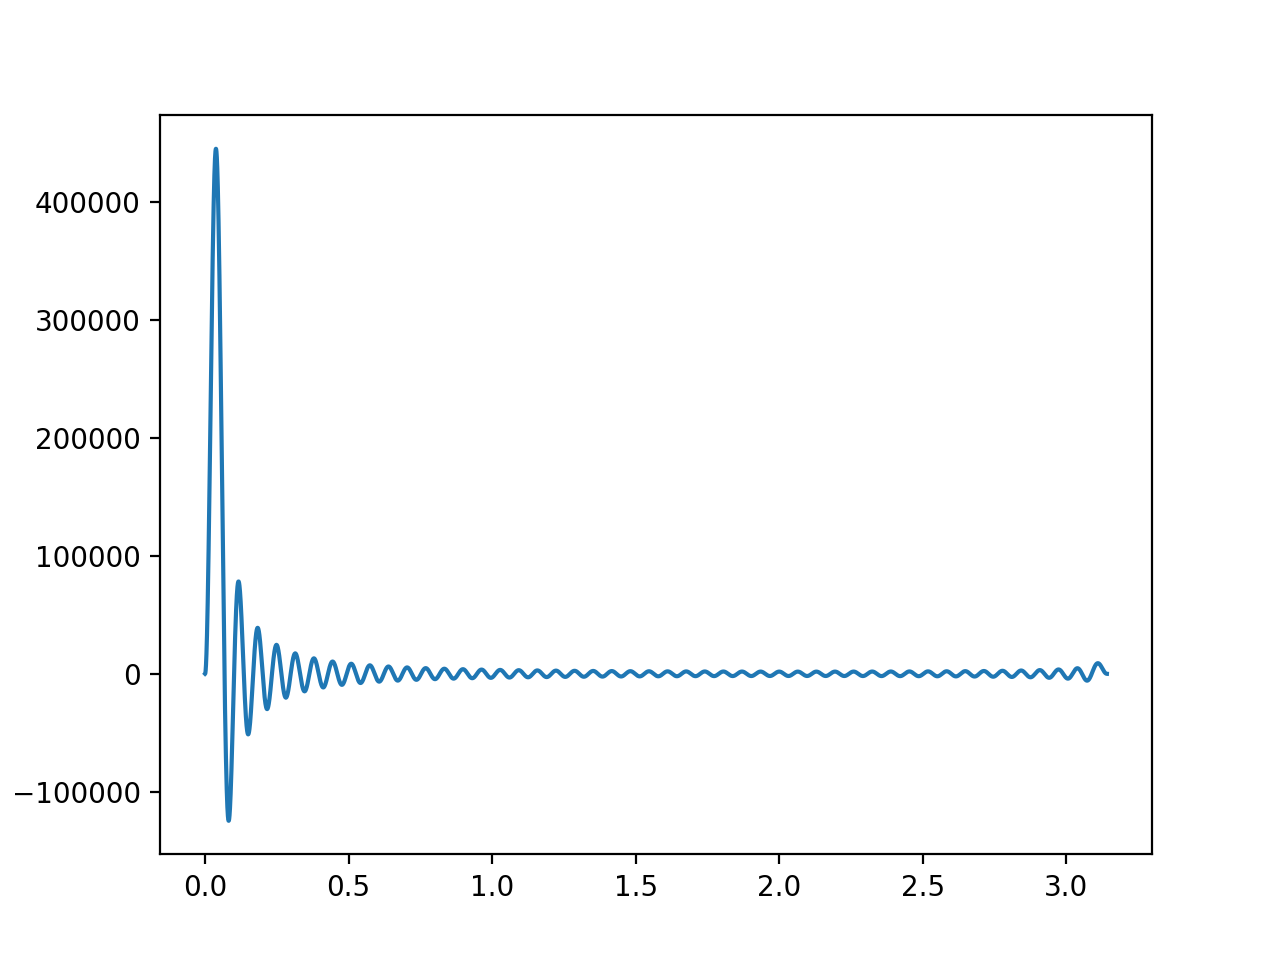

In [200]:
figure()
plot(theta,rectheta2step)

figure()
plot(theta,rectheta,"-")
#plot(theta,rectheta)

<IPython.core.display.Javascript object>


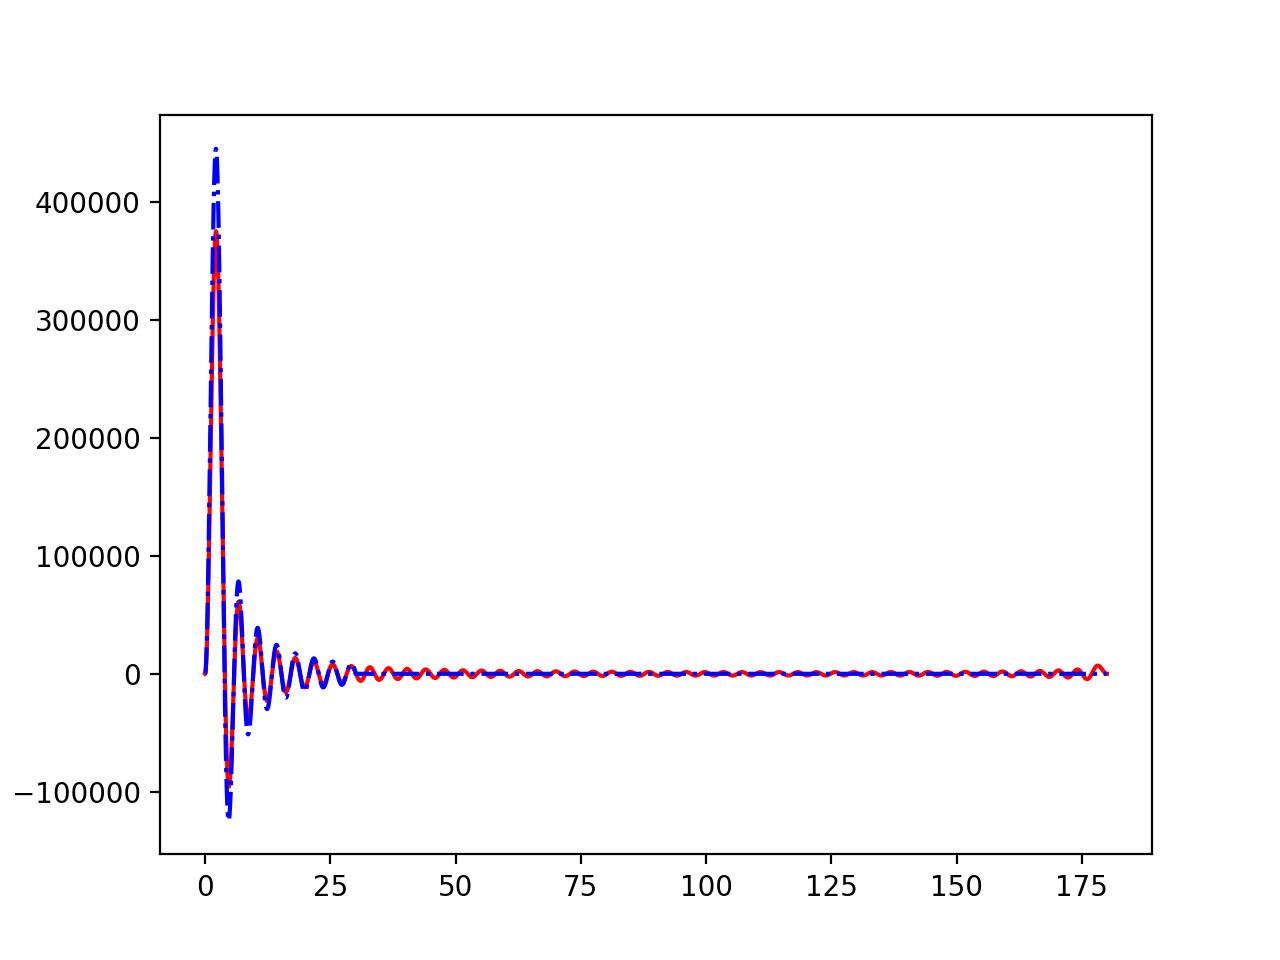

<IPython.core.display.Javascript object>


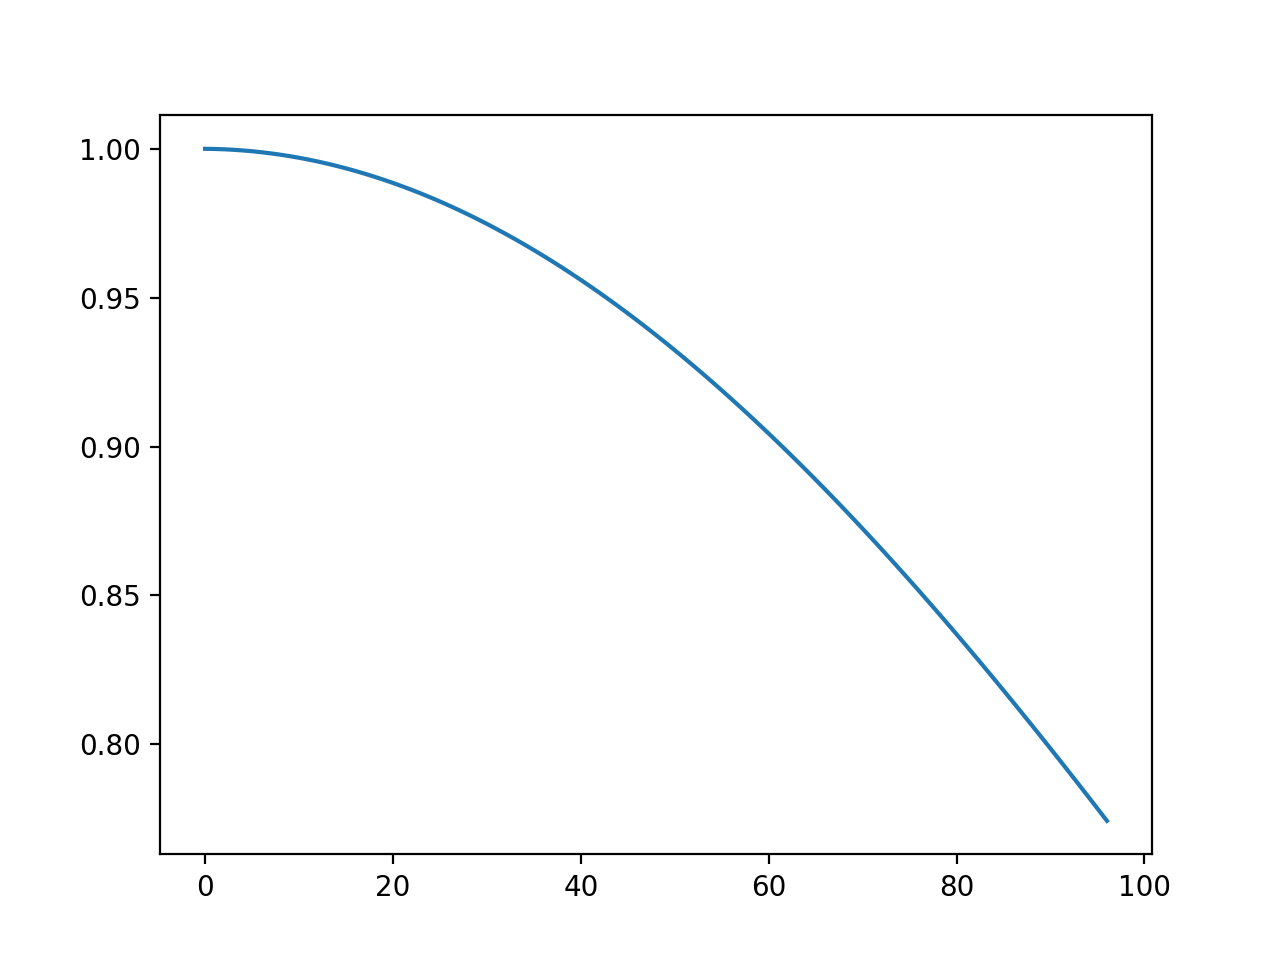

In [91]:
bl=h.gauss_beam((60./60.)*pi/180.,lmax=lmax)

# Calculate c(theta) given cl2 coefficients
l0=0.0
rectheta2=zeros(theta.size,float)
rectheta=zeros(theta.size,float)
#def cal_ctheta(cl,lmax):   
for i in arange(theta.size):
    for j in arange(lmax-1):
        l=j+2
        #rectheta2[i]=rectheta2[i] + exp(-(l-l0)**2/(2.*10.**2.))*sqrt((2.*l+1)/(4.*pi))*pl2[l,i]
        rectheta2[i]=rectheta2[i] + bl[l]*sqrt((2.*l+1)/(4.*pi))*pl2[l,i]
        rectheta[i]=rectheta[i] + sqrt((2.*l+1)/(4.*pi))*pl2[l,i]
        
figure()
plot(theta*180./pi,rectheta2,"r-")
plot(theta*180./pi,rectheta*fnstep(theta,30.*pi/180.),"b-.")

figure()
#plot(ell,exp(-(ell-l0)**2/(2.*10.**2.)))
plot(ell,bl)

In [49]:
lmax=96
ell=arange(lmax+1)
cl0=lgdr.legfit(np.cos(theta),f2theta(theta,shift,width,slope),lmax)*4.*pi/(2.*ell+1)
rectheta0=lgdr.legval(np.cos(theta),cl0*((2*ell+1)/(4.*pi)),tensor=False) 

<IPython.core.display.Javascript object>


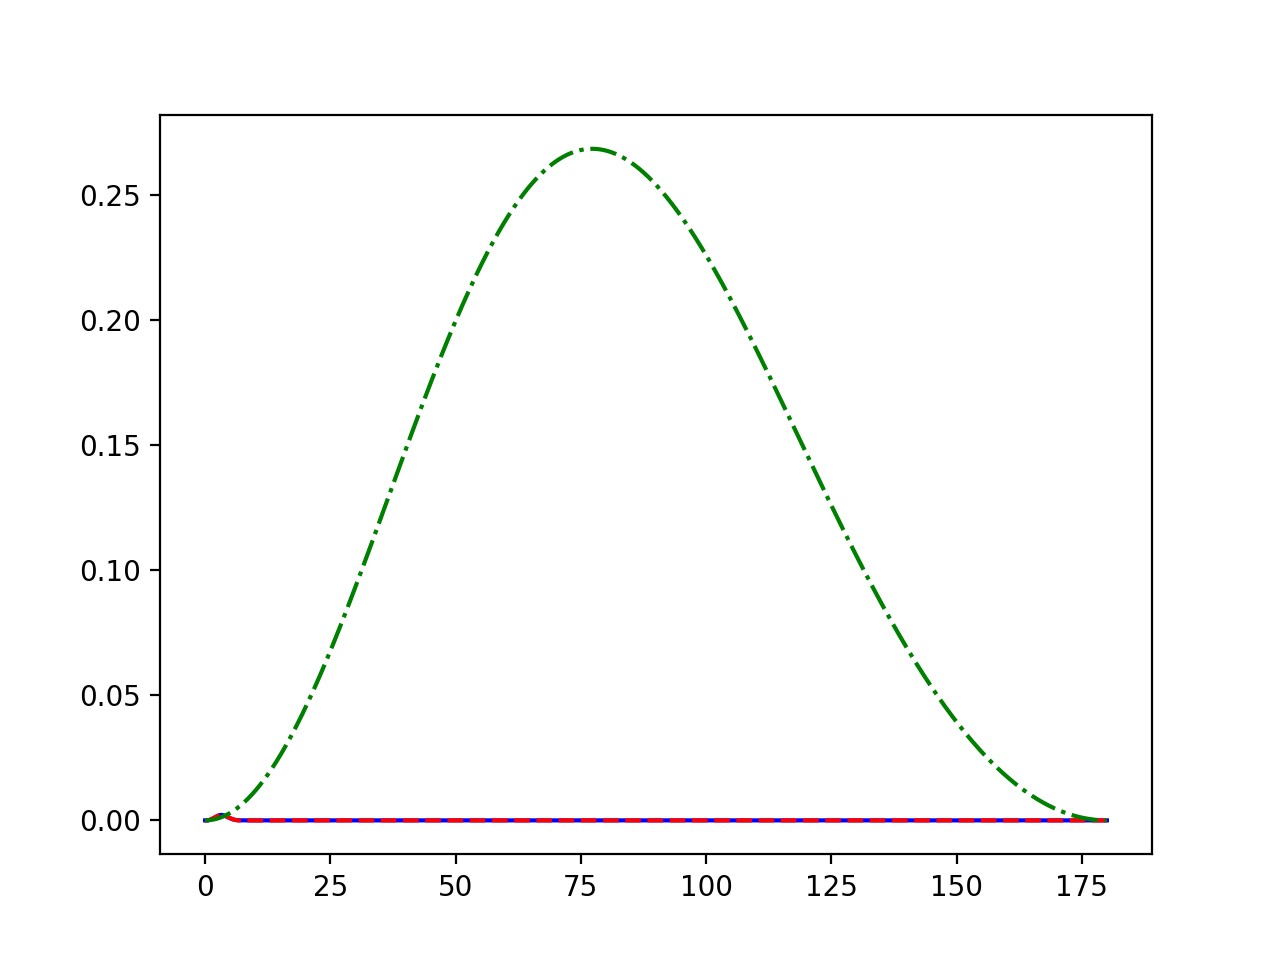

In [62]:
figure()
plot(theta*180./pi,f2theta(theta,shift,width,slope),"b-")
plot(theta*180./pi,rectheta0,"r--")
plot(theta*180./pi,rectheta2,"g-.")
#plot(theta*180./pi,rectheta2inv,"m-.")
#xlim(0,10)

def fn1(x,shift,width,slope,norm):
    return norm*(x**slope)*exp((-(x-shift)**2.)/(2.*(width**2.)))

shift0,width0,slope0,norm0=curve_fit(fn1,ell[2:],cl2[2:],(2,5,-2,1e-7))[0]
print shift0,width0,slope0,norm0

<IPython.core.display.Javascript object>


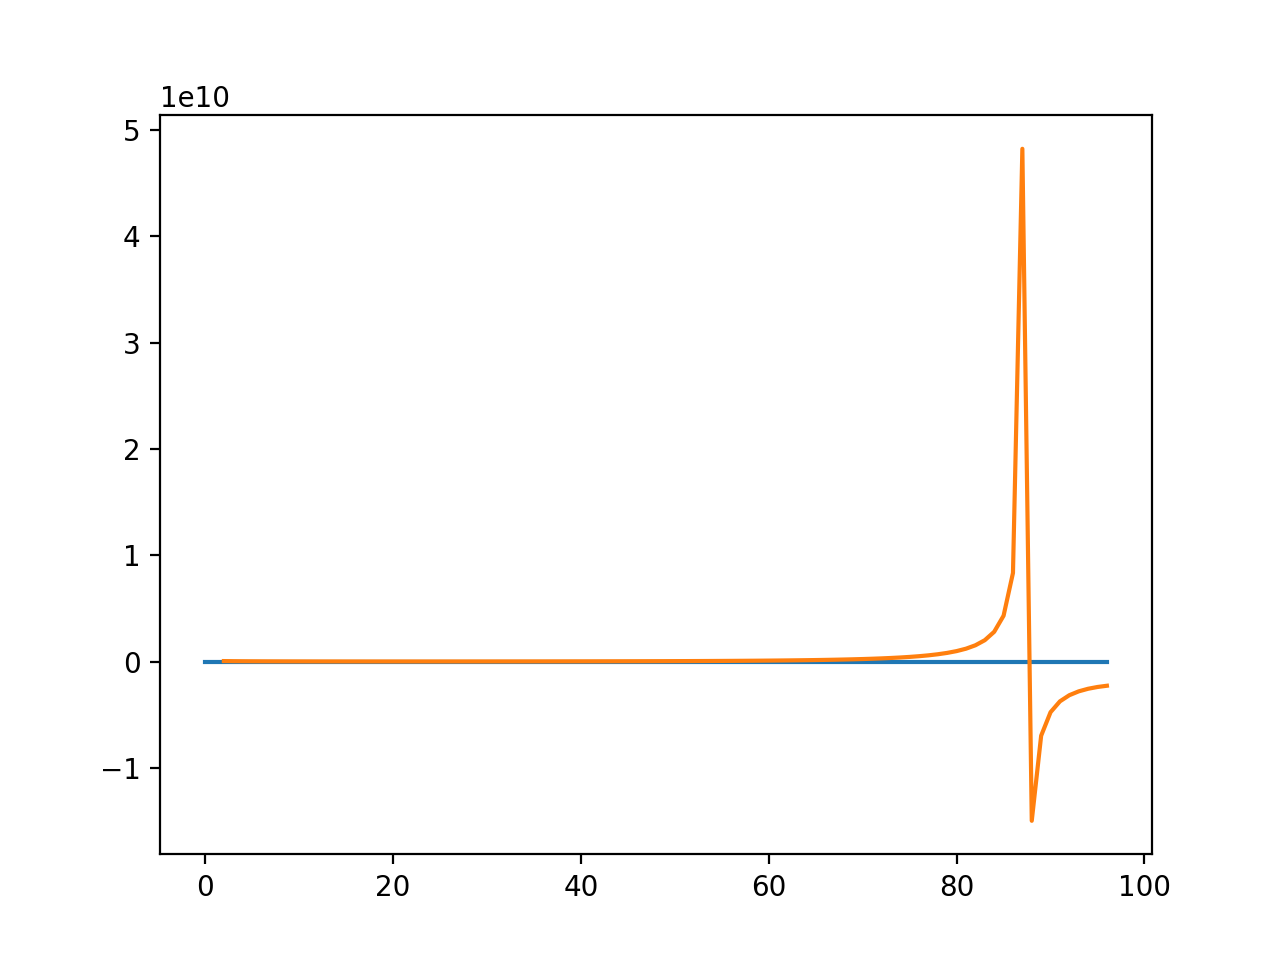

<IPython.core.display.Javascript object>


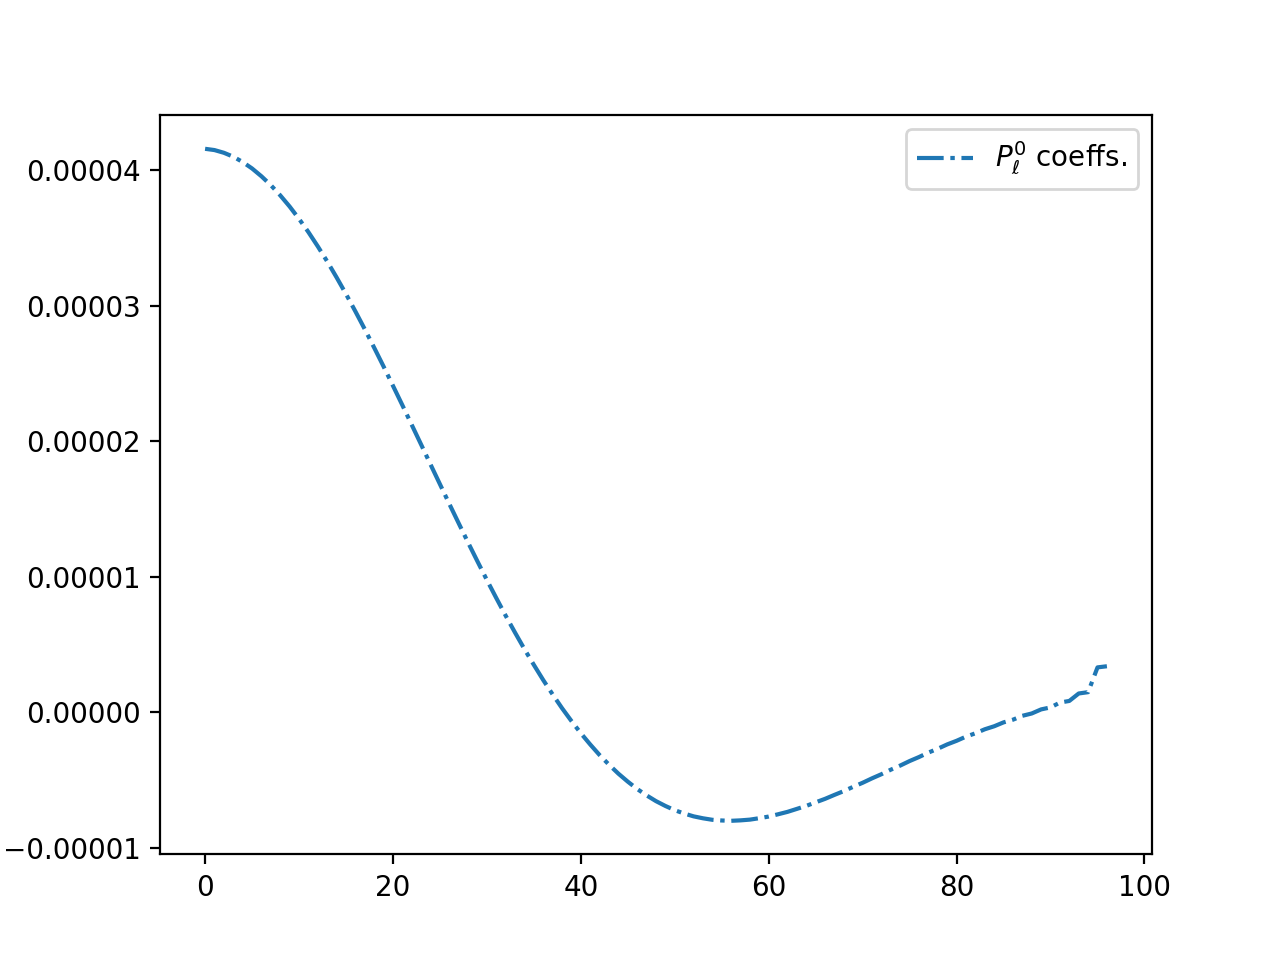

In [60]:
figure()
plot(ell,cl2,"-",label="$P_{\ell}^2$ coeffs.")
plot(ell[2:],1/cl2[2:],"-",label="$P_{\ell}^2$ coeffs.")
#plot(ell,fn1(ell,shift0,width0,slope0,norm0),"--",label="$P_{\ell}^2$ coeffs.")
#legend(loc=0)


figure()
plot(ell,cl0,"-.",label="$P_{\ell}^0$ coeffs.")
legend(loc=0)

#semilogy()
